<a href="https://colab.research.google.com/github/AkashSalmuthe/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Business Objective:**




  
* **Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.** 


* **We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.**




* **Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.**

* **So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters**.

* ***The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.***
 



In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **1. Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Capstone Projects/3. Supervised Learning - Classification/Credit Card Default Prediction - Akash Salmuthe/default_of_credit_card_clients.xlsx')


In [4]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Get rid of first row and use second row as a header

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Capstone Projects/3. Supervised Learning - Classification/Credit Card Default Prediction - Akash Salmuthe/default_of_credit_card_clients.xlsx',header=1)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### ***Dataset has 30000 rows and 25 columns***
### ***All columns are numeric***

In [8]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* ***default payment next month is our target variable we need to focus on this***

# **2. Features description**

**Breakdown of Our Features:**

***We have records of 30000 customers. Below are the description of all features we have***.

* ***ID: ID of each client*** 

* ***LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)***

* ***SEX: Gender (1 = male, 2 = female)*** 

* ***EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)***

* ***MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)***

* ***AGE: Age in years***

**Scale for PAY_0 to PAY_6** : 

***(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above***)

* ***PAY_0: Repayment status in September, 2005 (scale same as above***) 

* ***PAY_2: Repayment status in August, 2005 (scale same as above)***

* ***PAY_3: Repayment status in July, 2005 (scale same as above)***

* ***PAY_4: Repayment status in June, 2005 (scale same as above)***

* ***PAY_5: Repayment status in May, 2005 (scale same as above)***

* ***PAY_6: Repayment status in April, 2005 (scale same as above)***

* ***BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)***

* ***BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)***

* ***BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)***

* ***BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)***

* ***BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)***

* ***BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)***

* ***PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)***
* ***PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)***

* ***PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)***

* ***PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)***

* ***PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)***

* ***PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)***

* ***default.payment.next.month: Default payment (1=yes, 0=no)***

**NOTE:-**

 **What do 0 and -2 mean in PAY_X columns?**

***From dataset documentation:***

**PAY_0: Repayment status in September, 2005 (-1=pay delay, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above). Notice code 0 and 2 are in the PAY_X columns but are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation**. 
 
#### -2: No consumption; <br>-1: Paid in full; <br>0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.


## **3. Preprocessing the dataset**

### 3.1 Looking for missing values

In [10]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
df.isna().sum().sum()

0

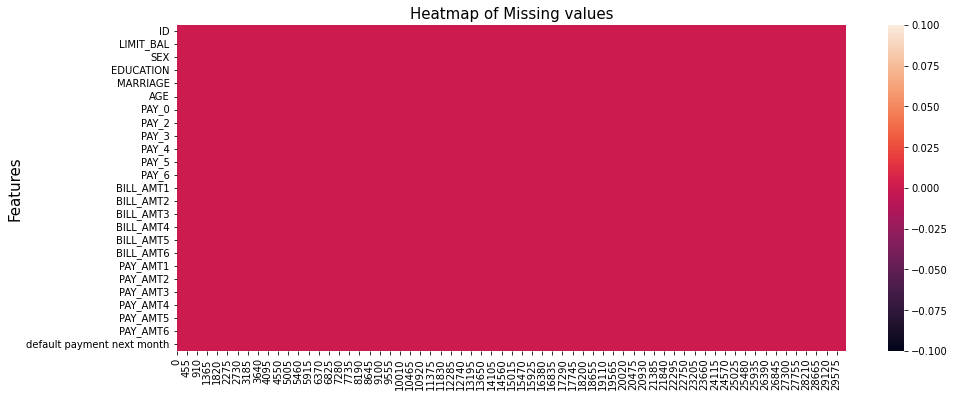

In [12]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull().T)

plt.title("Heatmap of Missing values",fontsize=15)
#plt.xlable("Feature",fontsize=15)
plt.ylabel("Features",fontsize=15)
plt.show()

### 3.2 Looking for Duplicate values

In [13]:
dv = df.duplicated().sum()

print(f'In dataset, {dv} Duplicate values are present')

In dataset, 0 Duplicate values are present


# **4. Exploratory Data Analysis**

In [14]:
# Changing name for better understanding
df.rename(columns={'default payment next month' : 'default_payment_next_month'}, inplace=True)

In [15]:
df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [16]:
# Get % of customer will going to default next month

df['default_payment_next_month'].value_counts(normalize=True)*100

0    77.88
1    22.12
Name: default_payment_next_month, dtype: float64

there are 22.12 % customers 

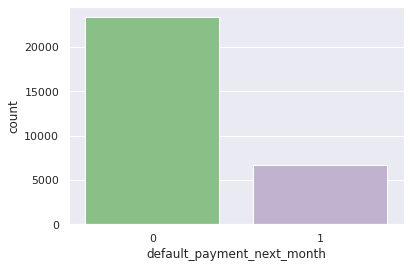

In [17]:
sns.set(style='darkgrid')
sns.countplot(x='default_payment_next_month',data=df,palette='Accent')

**From the above data analysis we can say that**
*   0 - Not Default
*   1 - Default
   
Defaulters are less than the Non Defaulters in the given dataset.

## **4.1 Analysis of Independent variable**

### **4.1.1 Categorical  Features**

***We have few categorical features in our dataset that are***
*   sex
*   education
*   marraige 
*   age

***Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories. These groups may consist of alphabetic (e.g., male, female) or numeric labels (e.g., male = 0, female = 1) that do not contain mathematical information beyond the frequency counts related to group membership.***


#### **SEX**

In [18]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

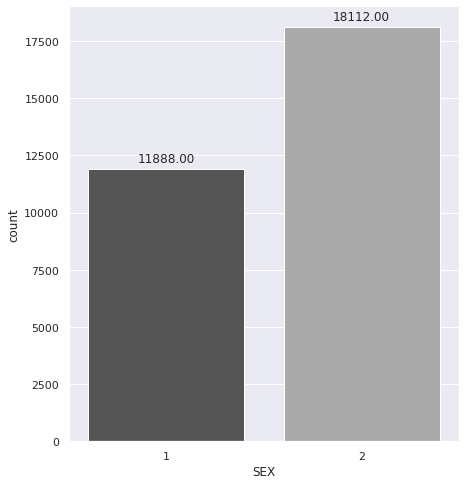

In [19]:
plt.figure(figsize=(7,8))
ax = sns.countplot(x = 'SEX', data = df,palette='gist_gray')

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2., p.get_height()+30),
                    ha = 'center',va = 'center', xytext = (0, 10), textcoords = 'offset points')

**From the above data analysis we can say that**
*   **1 - Male**
*   **2 - Female**

Number of Male credit holder is less than Female.

#### **Education**

In [20]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**'EDUCATION' column:** notice 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other'.

In [21]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

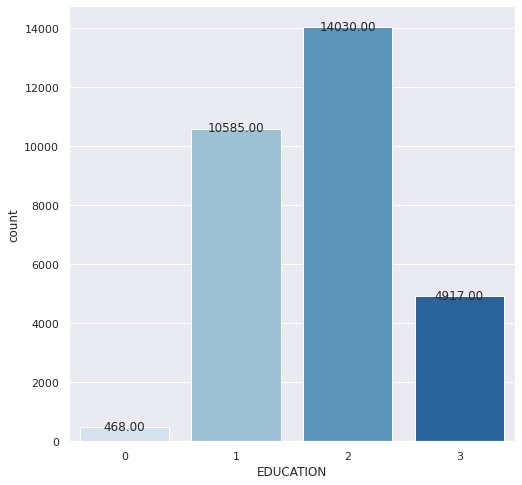

In [22]:
plt.figure(figsize=(8,8))
axx = sns.countplot(x = 'EDUCATION', data = df,palette='Blues')

for p in axx.patches:
        axx.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2., p.get_height()+30),
                    ha = 'center',va = 'center')

**From the above data analysis we can say that**
*   More number of credit holders are university students followed by Graduates and then High school students.

#### **Marriage**


* 1 = married; 
* 2 = single; 
* 3 = others

In [23]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0
df["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [24]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

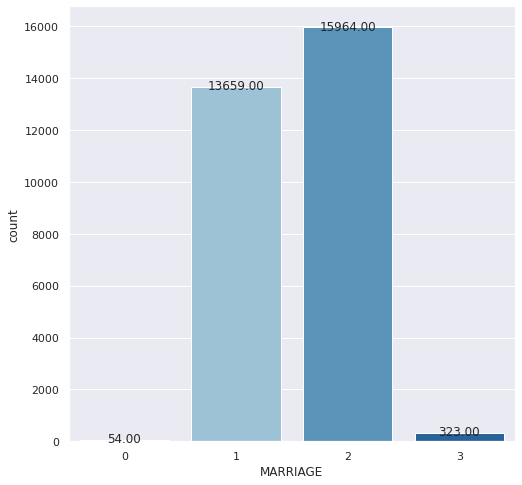

In [25]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x = 'MARRIAGE', data = df,palette='Blues')

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2., p.get_height()+30),
                    ha = 'center',va = 'center')

In [26]:
# How many customers had "MARRIAGE" status as 0?

df["MARRIAGE"].value_counts(normalize=True)*100

2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64

***'MARRIAGE' column: what does 0 mean in 'MARRIAGE'?***

Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'.

In [27]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

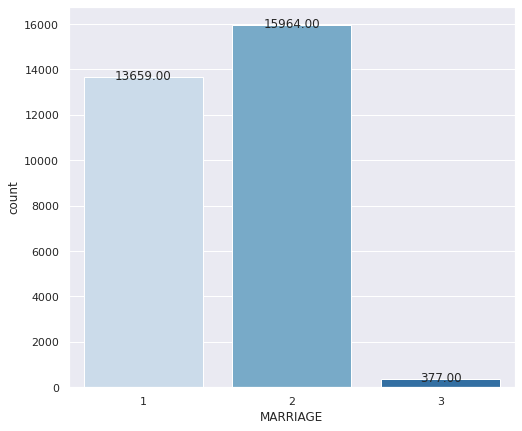

In [28]:
plt.figure(figsize=(8,7))
ax = sns.countplot(x = 'MARRIAGE', data = df,palette='Blues')

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2., p.get_height()+30),
                    ha = 'center',va = 'center')

**From the above data analysis we can say that**
*   1 - married
*   2 - single
*   3 - others

More number of credit cards holder are Single.


#### **AGE**

**Plotting graph of number of ages of all people with credit card irrespective of gender.**

In [29]:
# counts the education  data set
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [30]:
#check the mean of the age group rescpective to the default_payment_next_month
df.groupby('default_payment_next_month')['AGE'].mean()

default_payment_next_month
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [31]:
# Convert data type float to intger

df = df.astype('int')

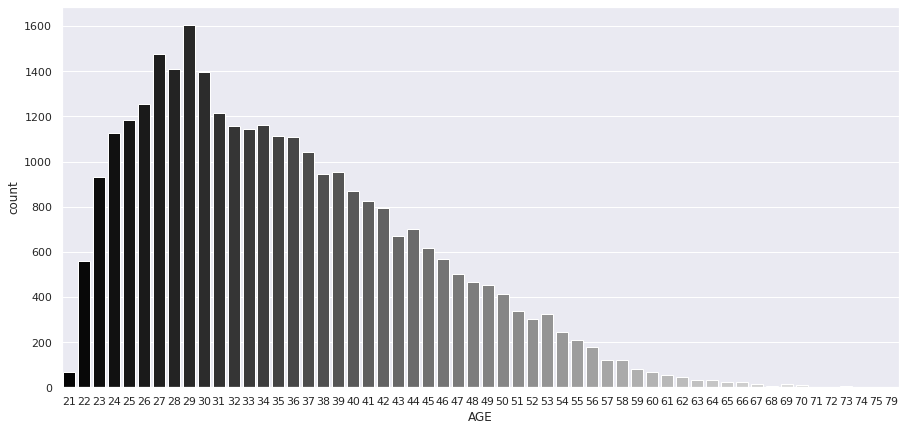

In [32]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
ax = sns.countplot(x = 'AGE', data = df,palette='gist_gray')

plt.show(ax)


**With Respective gender**

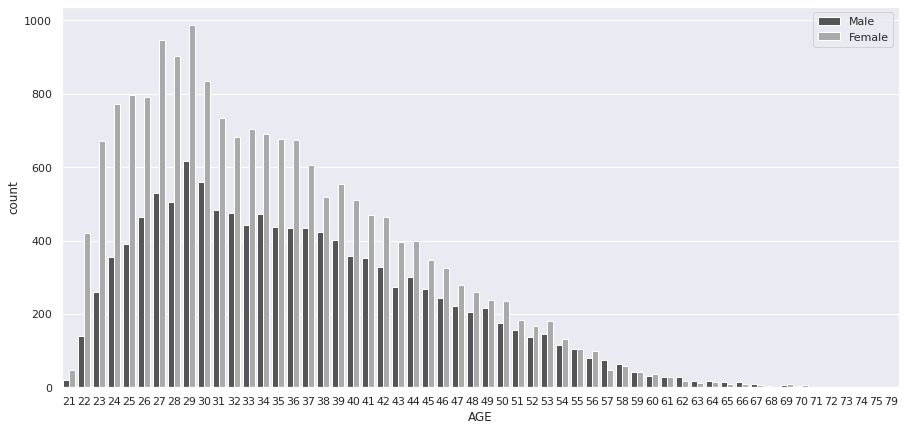

In [33]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
ax = sns.countplot(x = 'AGE', data = df,palette='gist_gray',hue="SEX")

plt.legend(loc='upper right', labels=['Male', 'Female'])
plt.show(ax)


**From the above data analysis we can say that**

*  We can see more number of credit cards holder age are between 26-30 years old.
*  Age above 60 years old rarely uses the credit card.

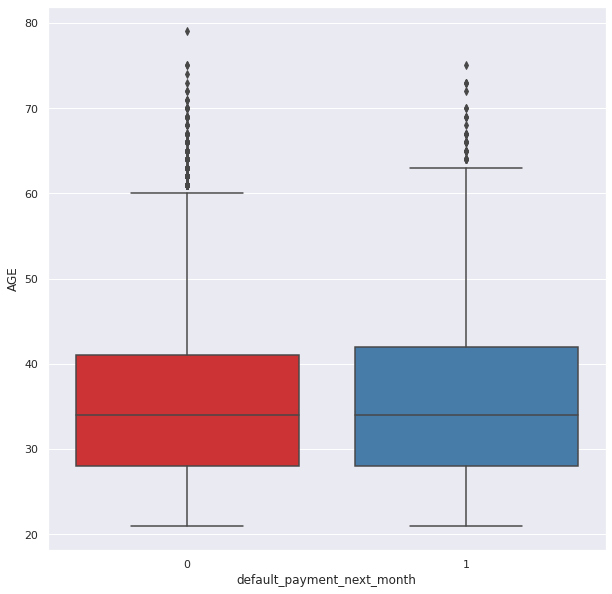

In [34]:
#plotting the box plot to vizualize the data distribution

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="AGE", data=df,palette='Set1')

### **4.1.2 Numerical features**


#### **Limit Balance**

In [35]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Distribution of LIMIT_BAL

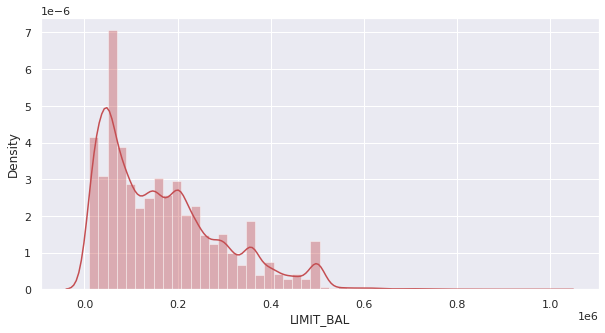

In [36]:

plt.figure(figsize=(10,5))
sns.distplot(df['LIMIT_BAL'], kde=True,color='r')
plt.show()

#### Maximum amount of given credit in NT dollars is 50,000 followed by 30,000 and 20,000.

#### default_payment_next_month vs LIMIT BAL

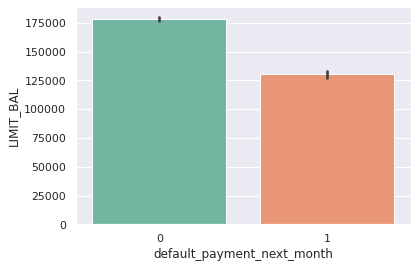

In [37]:
sns.barplot(x='default_payment_next_month', y='LIMIT_BAL', data=df,palette='Set2')

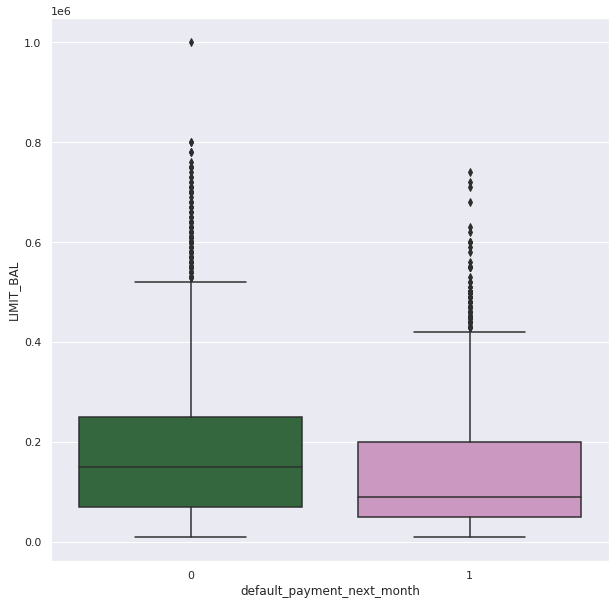

In [38]:
#plotting the box plot to vizualize the data distribution

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="LIMIT_BAL", data=df,palette='cubehelix')

#### **Renaming columns**

In [39]:
#renaming columns 

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_SEPT                    30000 non-null  int64
 7   PAY_AUG                     30000 non-null  int64
 8   PAY_JUL                     30000 non-null  int64
 9   PAY_JUN                     30000 non-null  int64
 10  PAY_MAY                     30000 non-null  int64
 11  PAY_APR                     30000 non-null  int64
 12  BILL_AMT_SEPT               30000 non-null  int64
 13  BILL_AMT_AUG                30000 non-null  int64
 14  BILL_A

In [41]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### **Total Bill Amount**

**What does SNS Pairplot do?**
* **pairplot:** Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.

In [42]:
#assign the bill amount variable to a single variable 
total_bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

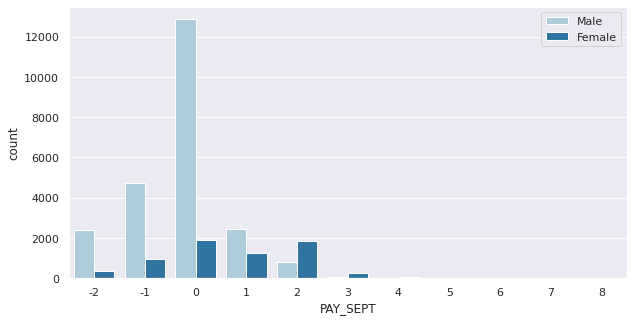

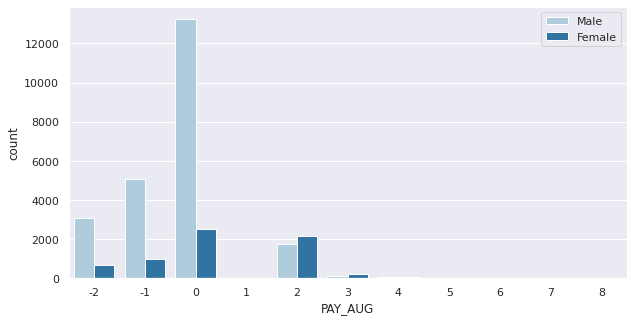

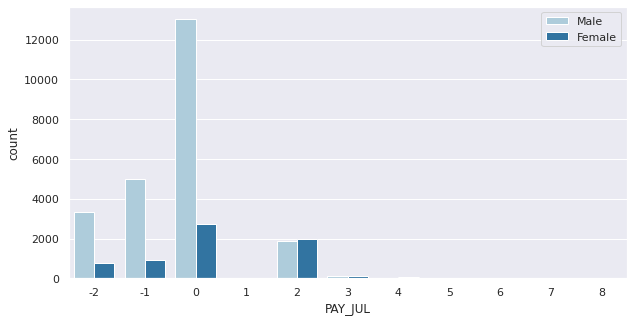

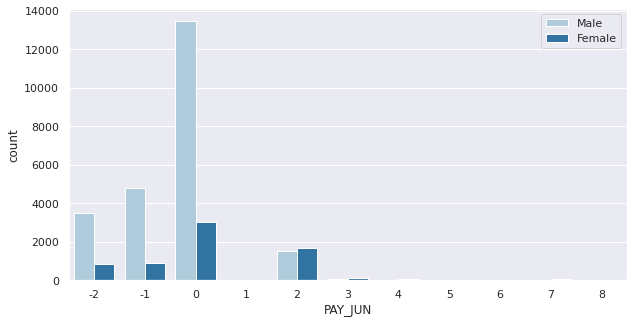

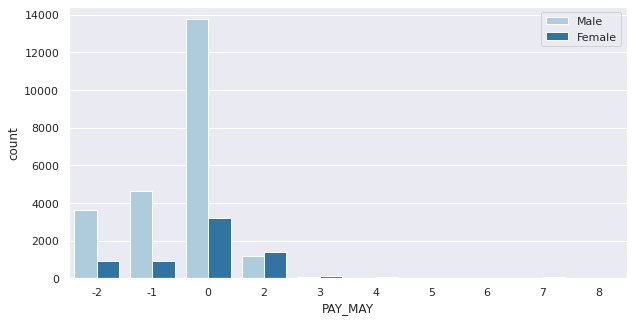

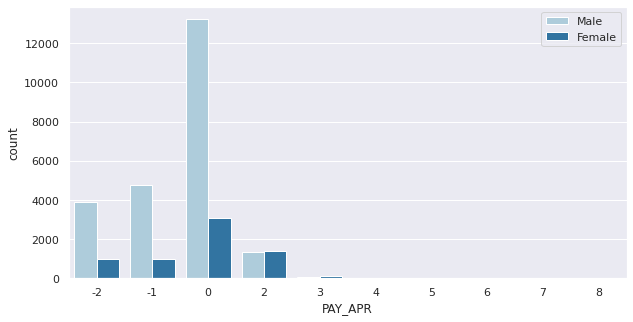

In [43]:
#plotting the count plot for Previous payment status

pre_payment = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']

for col in pre_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_payment_next_month', data = df,palette='Paired')
  plt.legend(loc='upper right', labels=['Male', 'Female'])

### **Paid Amount**

In [44]:
#assign the Paid Amount variable to a single variable 
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'default_payment_next_month']]

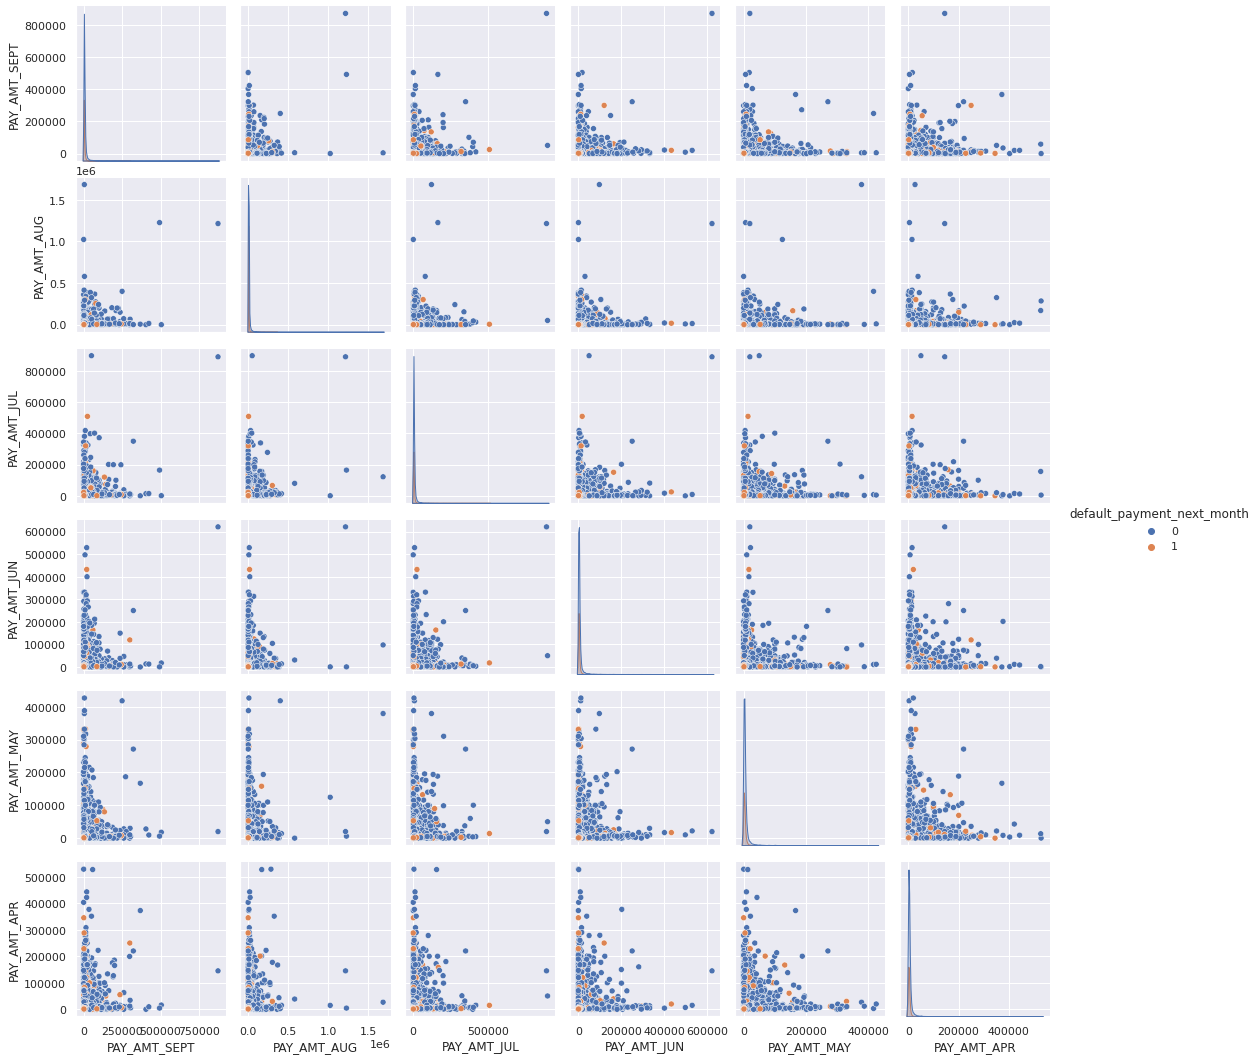

In [45]:
#plotting the pair plot for paid amount
sns.pairplot(data = pay_amnt_df, hue='default_payment_next_month')

### **Bivariate Analysis**

**what is bivariate analysis**
* Bivariate analysis is one of the simplest forms of quantitative analysis.It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association

###**Sex and default_payment_next_month**

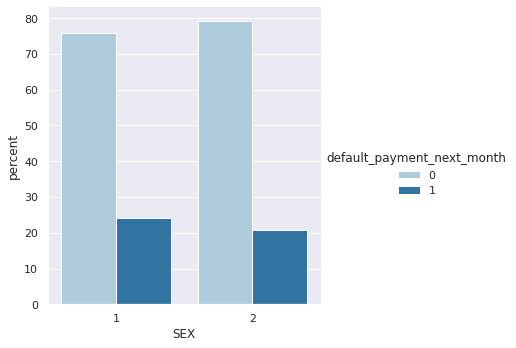

In [46]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'SEX', 'default_payment_next_month'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='Paired'))

#plt.legend(loc='upper right', labels=['Male', 'Female'])

* ***It is evident from the above graph that the number of defaulter have high proportion of males.***

#### **Education and default_payment_next_month**

<Figure size 720x360 with 0 Axes>

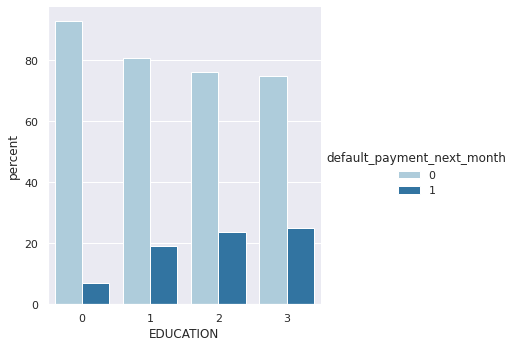

In [47]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month

plt.figure(figsize=(10,5))
x,y = 'EDUCATION', 'default_payment_next_month'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette="Paired"))


* ***From the above plot it is clear that those people who are other students have higher default payment wrt graduates and university people***

#### **Marriage and default_payment_next_month**

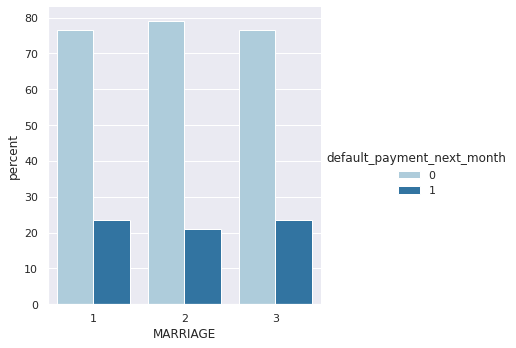

In [48]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'MARRIAGE', 'default_payment_next_month'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette='Paired'))

* ***High defaulter rate when it comes to others*** 

#### **Age and default_payment_next_month**

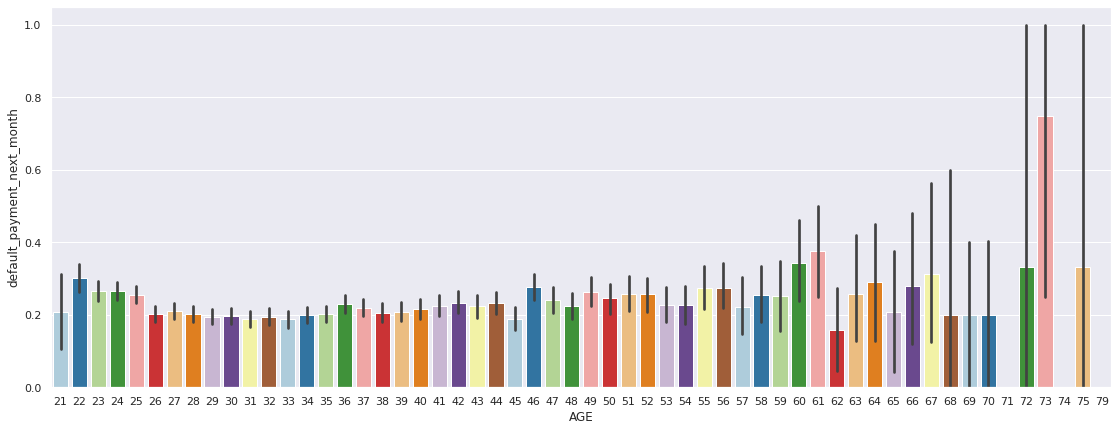

In [49]:
#plotting the bar plot to vizualize the data distribution related to the default_payment_next_month

plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'default_payment_next_month', data = df,palette='Paired')

plt.show()

* **Slightly higher defaulter rate in  60's**. 

### **Checking of Correlation between variables**

* we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables

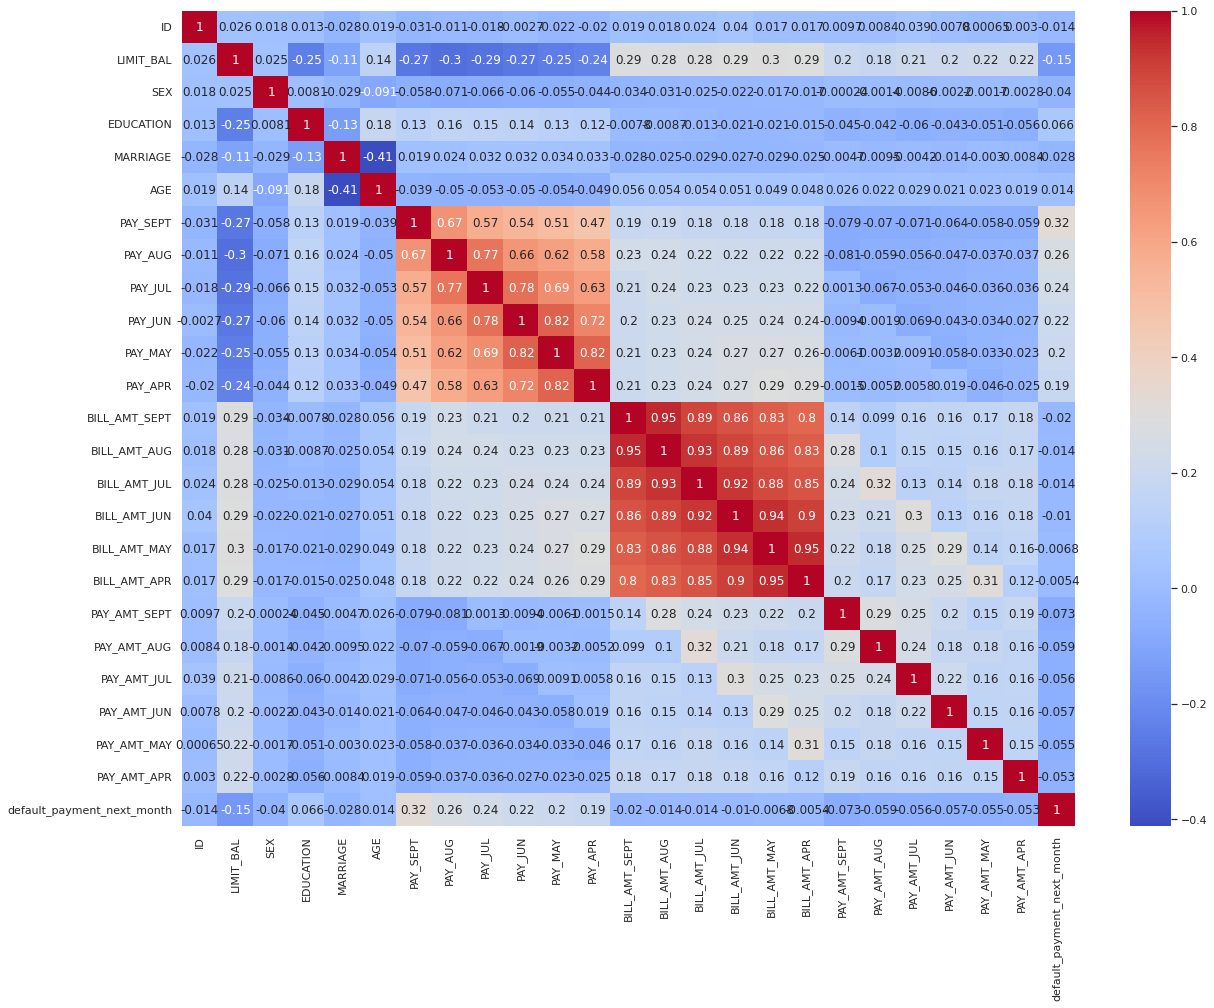

In [50]:
#plotting the heatmap 

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

* ***It seems from the above graph is there are some negatively correlated feature like age but we cannot blindly remove this feature because it could be important feature for prediction.*** 
* ***ID is unimportant and it has no role in prediction so we will remove it.***


###**4.2 SMOTE**

* In our data set we have  Imbalanced Data Distribution in our dependent variable, it  generally happens when observations in one of the class are much higher i.e not defaulter or lower than the other classes i.e defaulter.

* As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.

* Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.
 

* **SMOTE** (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. 
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
 

In [51]:
#import the module 
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default_payment_next_month'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [52]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,3983,360000,1,1,2,31,0,-1,-1,-2,-2,-2,569,1242,0,0,0,0,1242,0,0,0,0,0
46724,23504,230000,2,2,2,30,-1,0,-1,1,-1,-1,3683,5270,3755,1940,1708,2286,4906,3755,330,1708,2286,2784
46725,29136,10000,2,2,2,52,1,2,2,2,0,0,9594,7003,8269,8143,8841,9632,2599,1529,211,764,858,7092
46726,25616,90000,1,1,1,32,2,0,0,0,0,0,88536,88957,89453,90503,63841,64317,3750,3731,3222,1301,2365,2953


In [53]:
columns = list(df.columns)

In [54]:
columns.pop()

'default_payment_next_month'

In [55]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [56]:
balance_df['default_payment_next_month'] = y_smote

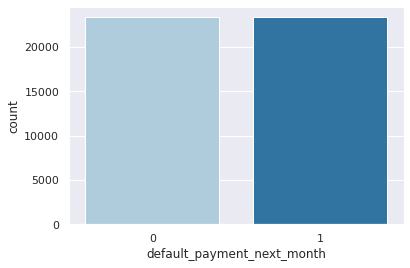

In [57]:
#plot the count plot after smote
sns.countplot('default_payment_next_month', data = balance_df,palette='Paired')

In [58]:
balance_df[balance_df['default_payment_next_month']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,3983,360000,1,1,2,31,0,-1,-1,-2,-2,-2,569,1242,0,0,0,0,1242,0,0,0,0,0,1
46724,23504,230000,2,2,2,30,-1,0,-1,1,-1,-1,3683,5270,3755,1940,1708,2286,4906,3755,330,1708,2286,2784,1
46725,29136,10000,2,2,2,52,1,2,2,2,0,0,9594,7003,8269,8143,8841,9632,2599,1529,211,764,858,7092,1
46726,25616,90000,1,1,1,32,2,0,0,0,0,0,88536,88957,89453,90503,63841,64317,3750,3731,3222,1301,2365,2953,1


# **5. Feature Engineering**

In [59]:
#save a copy file in other variable

credit_df_copy = balance_df.copy()

In [60]:
#assign the the sum of payment value in one 
credit_df_copy['total_Payement_Value'] = credit_df_copy['PAY_SEPT']+ credit_df_copy['PAY_AUG'] + credit_df_copy['PAY_JUL'] + credit_df_copy['PAY_JUN'] + credit_df_copy['PAY_MAY'] + credit_df_copy['PAY_APR']

In [61]:
#check the correlation by using mean
credit_df_copy.groupby('default_payment_next_month')['total_Payement_Value'].mean()

default_payment_next_month
0   -1.980140
1    1.595446
Name: total_Payement_Value, dtype: float64

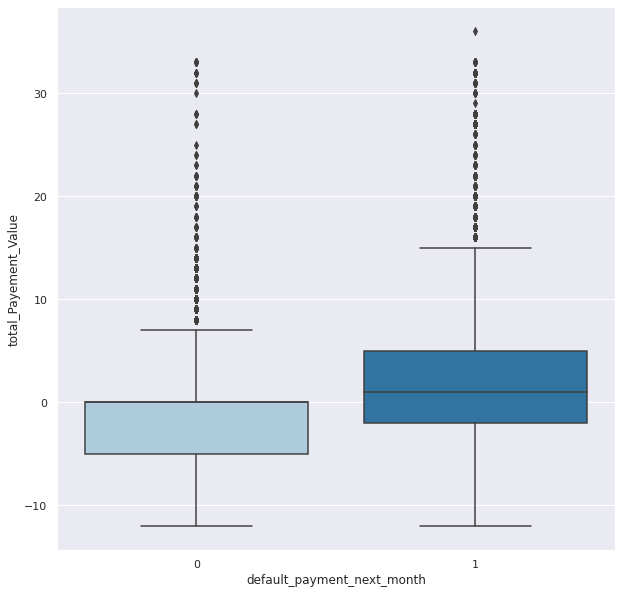

In [62]:
#plotting the box plot 
plt.figure(figsize=(10,10))
sns.boxplot(data = credit_df_copy, x = 'default_payment_next_month', y = 'total_Payement_Value',palette="Paired")

In [63]:
#create a new column due by calculating the sum of total bill ammount substract it from the total amont paid

credit_df_copy['Dues'] = (credit_df_copy['BILL_AMT_APR']
                          +credit_df_copy['BILL_AMT_MAY']
                          +credit_df_copy['BILL_AMT_JUN']
                          +credit_df_copy['BILL_AMT_JUL']
                          +credit_df_copy['BILL_AMT_SEPT'])-(credit_df_copy['PAY_AMT_APR']
                                                             +credit_df_copy['PAY_AMT_MAY']
                                                             +credit_df_copy['PAY_AMT_JUN']
                                                             +credit_df_copy['PAY_AMT_JUL']
                                                             +credit_df_copy['PAY_AMT_AUG']
                                                             +credit_df_copy['PAY_AMT_SEPT'])

In [64]:
#check the mean to calculate the correletion 
credit_df_copy.groupby('default_payment_next_month')['Dues'].mean()

default_payment_next_month
0    187742.051532
1    191983.821263
Name: Dues, dtype: float64

In [65]:
credit_df_copy.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                        'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'},
                        'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [66]:
#final data set
credit_df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,total_Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620


## **6. One Hot Encoding**

* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

* here we perform one hot encoding on 'EDUCATION','MARRIAGE','PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'

In [67]:
#get dummies 

credit_df_copy = pd.get_dummies(credit_df_copy,columns=['EDUCATION','MARRIAGE'])

In [68]:
#get dummies
credit_df_copy = pd.get_dummies(credit_df_copy, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

#### Label Encoding For SEX

In [69]:
# LABEL ENCODING FOR SEX

encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
credit_df_copy = credit_df_copy.replace(encoders_nums)

In [70]:
credit_df_copy.drop('ID',axis = 1, inplace = True)

In [71]:
credit_df_copy.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'default_payment_next_month',
       'total_Payement_Value', 'Dues', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single', 'PAY_SEPT_-1',
       'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4',
       'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1',
       'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4',
       'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1',
       'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4',
       'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1',
       'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 

In [72]:
credit_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46728 entries, 0 to 46727
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   46728 non-null  int64
 1   SEX                         46728 non-null  int64
 2   AGE                         46728 non-null  int64
 3   BILL_AMT_SEPT               46728 non-null  int64
 4   BILL_AMT_AUG                46728 non-null  int64
 5   BILL_AMT_JUL                46728 non-null  int64
 6   BILL_AMT_JUN                46728 non-null  int64
 7   BILL_AMT_MAY                46728 non-null  int64
 8   BILL_AMT_APR                46728 non-null  int64
 9   PAY_AMT_SEPT                46728 non-null  int64
 10  PAY_AMT_AUG                 46728 non-null  int64
 11  PAY_AMT_JUL                 46728 non-null  int64
 12  PAY_AMT_JUN                 46728 non-null  int64
 13  PAY_AMT_MAY                 46728 non-null  int64
 14  PAY_AM

In [73]:
credit_df_copy.shape

(46728, 85)

# **7. Model Training**

## **Performance Metrics**
* **Precision** is a good metric to use when the costs of **false positive(FP)** is high.

  **Precision = TP / (TP + FP)**

* **Recall** is a good metric to use when the cost associated with **false negative(FN)** is high.

  **Recall = TP / (TP + FN)**

* **F1-score** is a weighted average of **precision** and **recall**. Thus, it considers **FP** and **FN.** This metric is very useful when we have uneven class distribution, as it seeks a balance between **precision** and **recall.**

  **F1-score = 2 * (precision * recall) / (precision + recall)**

## **Note**
* In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default, since no actions can be taken. Thus, we will give **recall** more importance .

## **Import Packages for performing models**

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


## **7.1 Implementing Logistic Regression**

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [75]:
#make a copy

credit_df_logistic = credit_df_copy.copy()

In [76]:
credit_df_logistic.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,total_Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,...,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


##train test split data set

In [77]:
credit_df_logistic.shape

(46728, 85)

In [78]:
#define the X and y value
X = credit_df_logistic.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_logistic['default_payment_next_month']

In [79]:
columns = X.columns

In [80]:
#standardise the x value by using satandardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [81]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

**What is GridSearchCV?** 
* GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit our estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [82]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [83]:
#fit the parameter
 
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [84]:
optimized_clf = grid_lr_clf.best_estimator_

In [85]:
grid_lr_clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [86]:
grid_lr_clf.best_score_

0.7521642461203889

In [87]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [88]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

### Model Evaluation

In [89]:
# Get the accuracy scores

train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7539208483725685
The accuracy on test data is  0.7528046170806044


In [90]:
#print the accuracy,precission,recall,f1,roc_score 
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7528046170806044
The precision on test data is  0.6898832684824903
The recall on test data is  0.7891691394658754
The f1 on test data is  0.7361937716262977
The roc_score on test data is  0.7568700207178474


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.7515725309642695**
* The precision on test data is **0.6837872892347601**
* The recall on test data is **0.7909977494373593**
* The f1 on test data is **0.733495652173913**
* The roc_score on test data is  **0.7562800533390543**


**We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.**

### **Confusion Matrix**

#### Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

In [91]:
# Get the confusion matrix for both train and test
cm_lr = confusion_matrix(y_train, train_class_preds)
print(cm_lr)

[[12778  2875]
 [ 4829 10825]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

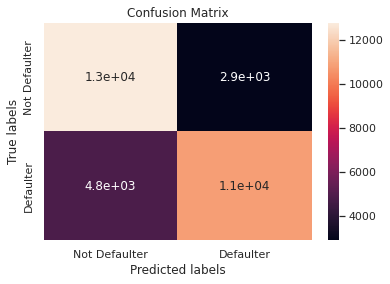

In [92]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_lr, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Features

***Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.***

In [93]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [94]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

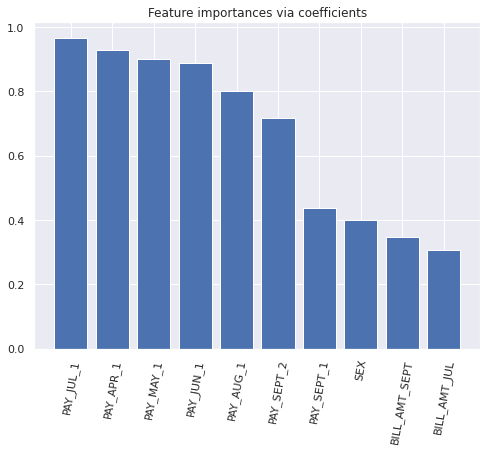

In [95]:
#plot the graph 

plt.figure(figsize=(8,6))
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

* **from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_JUL_1,PAY_MAY_1,PAY_APR_1**

## ROC AUC curve

**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate

* False Positive Rate

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve** 

In [96]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

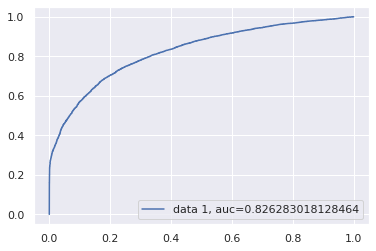

In [97]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#  **7.2 Implementing RandomForest**

**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting**

In [98]:
#import the packages

from sklearn.ensemble import RandomForestClassifier

In [99]:
#define the X and y value
X = credit_df_copy.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_copy['default_payment_next_month']

In [100]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [101]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

### **Model Evaluation**

In [102]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9993931069728814
The accuracy on test data is  0.8365216263536736


In [103]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8365216263536736
The precision on test data is  0.8098573281452659
The recall on test data is  0.8554596520071243
The f1 on test data is  0.832034112865614
The roc_score on test data is  0.8374811187885904



**from the above evalution we get the results as below**
* The accuracy on test data is  **0.832825368004669**
* The precision on test data is **0.8045395590142672**
* The recall on test data is **0.8528805169806132**
* The f1 on test data is **0.8280050724154042**
* The roc_score on test data is  **0.8339635770960995**

We can see from above results that we are getting  around **99%** train accuracy and 83% for test accuracy which depicts that model is **overfitting**. However our f1-score is around 82%, which is not bad.

In [104]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [105]:
#fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [106]:
grid_rf_clf.best_score_

0.8204554327044424

In [107]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [108]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [109]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [110]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9983709713482608
The accuracy on test data is  0.8374294792814992


In [111]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8374294792814992
The precision on test data is  0.8125810635538262
The recall on test data is  0.8550566398253037
The f1 on test data is  0.8332779144776218
The roc_score on test data is  0.8382646678246854


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.8347707671357241**
* The precision on test data is **0.8045395590142672**
* The recall on test data is **0.8562948647156268**
* The f1 on test data is **0.8296108064731844**
* The roc_score on test data is  **0.8359987225620449**

**After gridsearch we getting f1-sore approx 82%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.**

### **Confusion Matrix**

In [112]:
# Get the confusion matrix for both train and test
cm_rf = confusion_matrix(y_train, train_class_preds)
print(cm_rf)

[[15632    21]
 [   30 15624]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

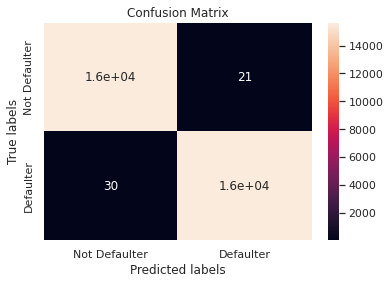

In [113]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Features

***Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.***

In [114]:
len(optimal_rf_clf.feature_importances_)

82

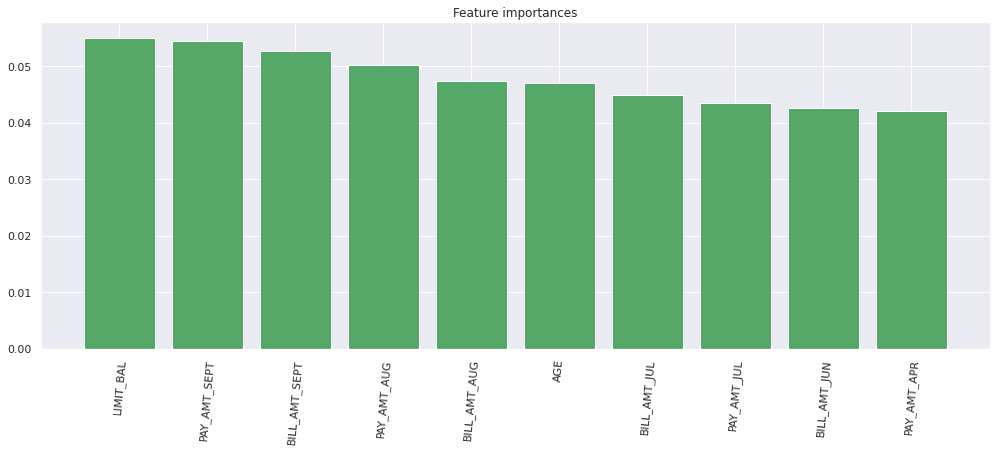

In [115]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()


* **from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are LIMIT_BAL,PAY_AMT_SEPT**

## ROC AUC curve

**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate

* False Positive Rate

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve**

In [116]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [117]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

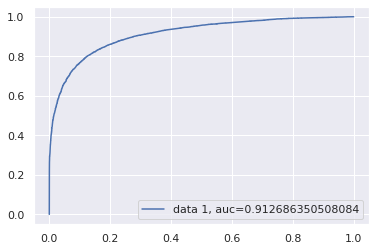

In [118]:
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **7.3 Implementing SVC**

**The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function.**

In [119]:
credit_df_svc = credit_df_copy.copy()

In [120]:
#import the packages
from sklearn.model_selection import GridSearchCV

##train test split data set

In [121]:
# #define the X and y value
# X = credit_df_svc.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
# y = credit_df_svc['default_payment_next_month']

In [122]:
# #standardise the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [123]:
# #split the data set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [124]:
#set the parmeter
#fit the parameter
#grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
#grid_clf.fit(X_train, y_train)

## **7.4 XGBoost** 

**XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework.**

**The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.fit() function.**

In [125]:
#import lightgbm and xgboost 

import lightgbm as lgb 
import xgboost as xgb

In [126]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [127]:
#setting parameters for xgboost

parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [128]:
#training model 

num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [129]:
#Execution time of the model 

execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=6, microseconds=457357)

In [130]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 

#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [131]:
len(train_class_preds_probs)

31307

In [132]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [133]:
test_class_preds_probs[:20]

array([0.2930601 , 0.2195037 , 0.42566097, 0.23071827, 0.26186016,
       0.26393723, 0.18109404, 0.36641544, 0.64160717, 0.31709218,
       0.42470714, 0.3520462 , 0.9629932 , 0.5755901 , 0.92823774,
       0.30552477, 0.5191703 , 0.47175565, 0.8688286 , 0.27259487],
      dtype=float32)

In [134]:
test_class_preds[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0]

In [135]:
len(y_train)

31307

In [136]:
len(train_class_preds)

31307

### **Model Evaluation**

In [137]:
# Get the accuracy scores

train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7833072475804134
The accuracy on test data is  0.773425847869788


In [138]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.773425847869788
The precision on test data is  0.7093385214007782
The recall on test data is  0.81359714370723
The f1 on test data is  0.7578991130820399
The roc_score on train data is  0.7779906628985626


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.7732313079566825**
* The precision on test data is **0.7050583657587549**
* The recall on test data is **0.8163387896080493**
* The f1 on test data is **0.8163387896080493**
* The roc_score on test data is  **0.7784045009441752**

### **Confusion Matrix**

In [139]:
# Get the confusion matrix for both train and test
cm_xg = confusion_matrix(y_train, train_class_preds)
print(cm_xg)

[[13344  2309]
 [ 4475 11179]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

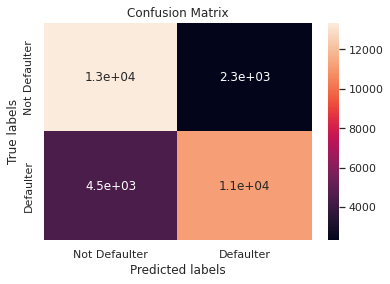

In [140]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_xg, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


### **Hyperparameter Tuning**

* **Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.**
* **We can leverage the maximum power of XGBoost by tuning its hyperparameters**

In [141]:
#import the packages
from xgboost import  XGBClassifier

In [142]:
#define the X and y value
X = credit_df_copy.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_copy['default_payment_next_month']

In [143]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [144]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [145]:
gsearch1.best_score_

0.8197527828216665

In [146]:
optimal_xgb = gsearch1.best_estimator_

In [147]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [148]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9128948797393555
The accuracy on test data is  0.8317878218014396


In [149]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8317878218014396
The precision on test data is  0.7972762645914397
The recall on test data is  0.8563666759543048
The f1 on test data is  0.8257657173562601
The roc_score on train data is  0.8333756223396418


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.8317878218014396**
* The precision on test data is **0.7939040207522697**
* The recall on test data is **0.8589671625035082**
* The f1 on test data is **0.8251550283095174**
* The roc_score on test data is  **0.8337029905344545**

In [150]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
PAY_AUG_1,0.164186
PAY_JUL_1,0.127522
PAY_AUG_2,0.081889
PAY_SEPT_2,0.059330
PAY_JUN_1,0.048141
PAY_APR_1,0.045014
PAY_MAY_1,0.038335
SEX,0.031701
MARRIAGE_married,0.022913
MARRIAGE_single,0.022340


### **Feature Importance**


***Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.***

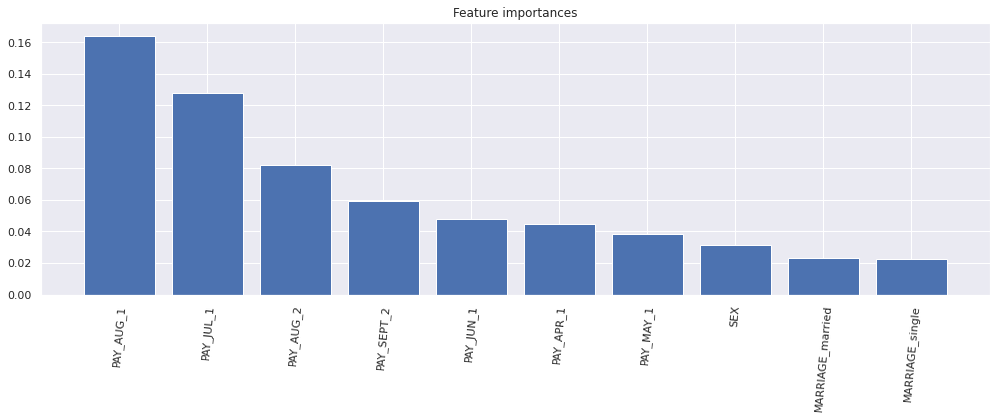

In [151]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,5))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

* **from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_AUG_1**

### ROC_AUC curve

**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate

* False Positive Rate

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve** 

In [152]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

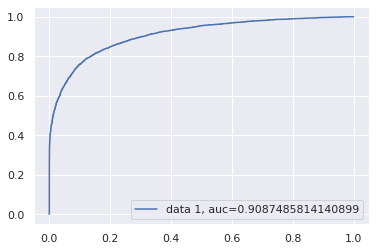

In [153]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### **Evaluating the models**

recall_score

In [154]:
#create a table of all models all score for comparison 

classifiers = ['Logistic Regression', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_rf, test_f1_score_xgb_tuned]

In [155]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.753921,0.752805,0.689883,0.789169,0.736194
1,Random Forest CLf,0.998371,0.837429,0.812581,0.855057,0.833278
2,Xgboost Clf,0.912895,0.831788,0.797276,0.856367,0.825766


# **8. Plotting ROC AUC for all the models**

In [190]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [191]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.00012968486577616392, 0.0001...","[0.0, 0.00012970168612191958, 0.11076523994811...",0.826283
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.03398184176394293, 0.03437094682230869...",0.912686
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.00025940337224...",0.908749


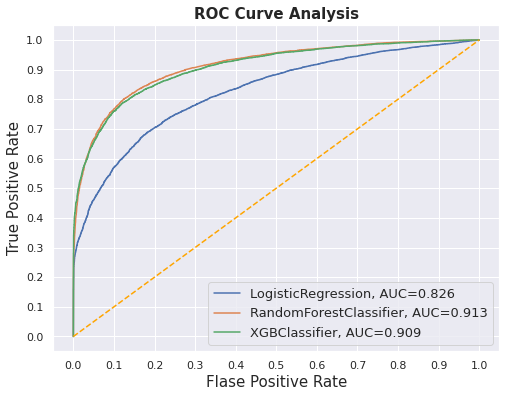

In [192]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# **9. Model Recommendation**

We recommend recall = 0.8, however, the threshold can be adjusted to reach higher recall.

In [193]:
# Compute precision, recall and threshold of Random Forest

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

recalls_80 = recalls[np.argmin(recalls >= 0.80)]               # Recommend recall score = 0.8
precision_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_80_recall = thresholds[np.argmin(recalls >= 0.80)]

thresholds = np.append(thresholds, 1)

recalls_80, precision_80, threshold_80_recall


(0.7998702983138781, 0.8542734450754952, 0.4960636)

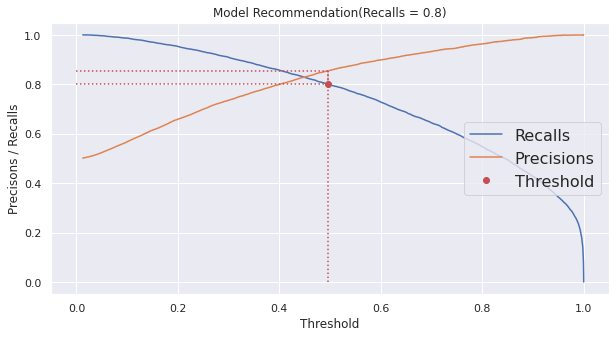

In [194]:
# Plot recommended recall = 0.8

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(thresholds, recalls, label='Recalls')
ax.plot(thresholds, precisions, label='Precisions')

ax.plot([threshold_80_recall, threshold_80_recall], [precision_80, recalls_80], "r:" )
ax.plot([threshold_80_recall, threshold_80_recall], [0, precision_80], "r:")
ax.plot([0, threshold_80_recall], [precision_80, precision_80], "r:")
ax.plot([0, threshold_80_recall], [recalls_80, recalls_80], "r:")
ax.plot([threshold_80_recall], [recalls_80], "ro", label='Threshold')

ax.set_xlabel('Threshold')
ax.set_ylabel('Precisons / Recalls')
ax.legend(loc='center right',fontsize=16)
plt.title('Model Recommendation(Recalls = 0.8)')
plt.savefig('recommended_recall')
plt.show()


# **Feature Importances**

Text(0.5, 1.0, 'Features importance')

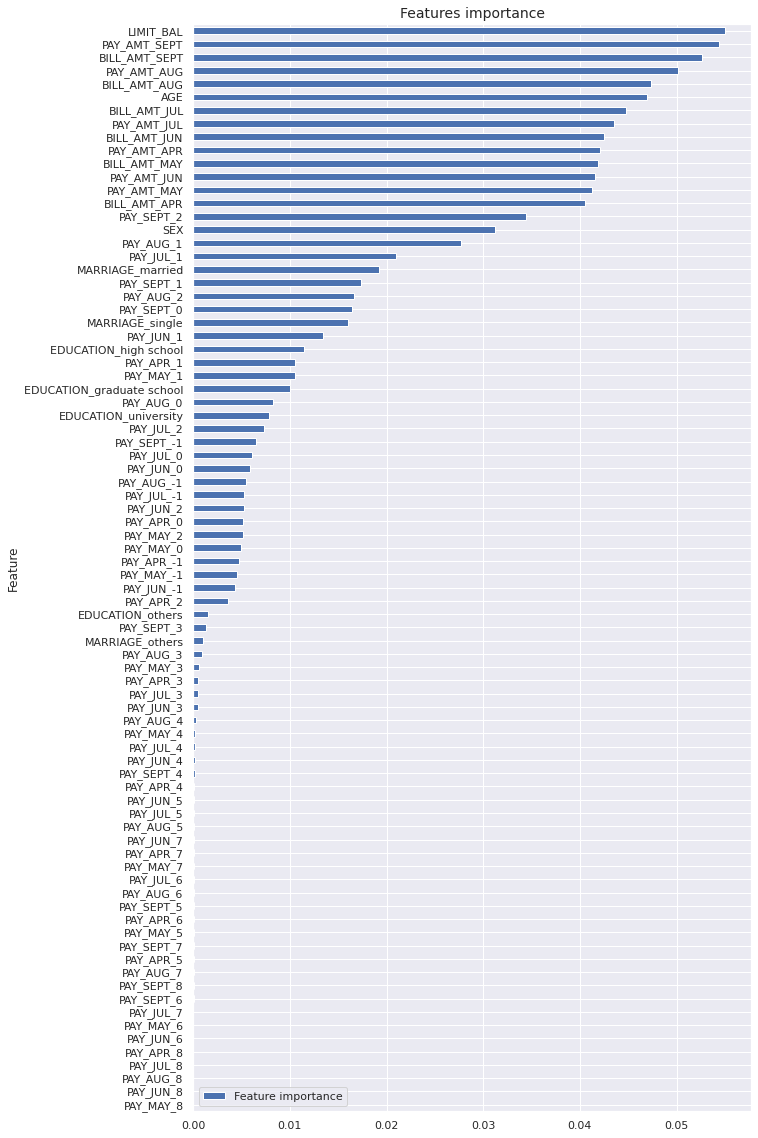

In [195]:
fea_df = pd.DataFrame({'Feature': columns, 'Feature importance': optimal_rf_clf.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,20))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

**"LIMT_BAL","BILL_AMT_SEPT" AND "PAY_AMT_SEPT" are the most recent 2 months' payment status and they are the strongest predictors of future payment default risk.**

#**10. Conclusion**

* Data categorical variables had minority classes which were added to their closest majority class
* There were not huge gap but female clients tended to default the most.
* Labels of the data were imbalanced and had a significant difference.
* XGBoost Classifier gave the highest accuracy of 83% on test dataset.
* Repayment in the month of september tended to be the most important feature for our machine learning model.
* The best **accuracy** is obtained for the **Random forest** and **XGBoost classifier.**
 
* In general, all models have comparable accuracy. Nevertheless, because the classes are imbalanced (the proportion of non-default credit cards is higher than default) this metric is misleading. 
 
* Furthermore, **accuracy** does not consider the rate of **false positives** (non-default credits cards that were predicted as default) and **false negatives** (default credit cards that were incorrectly predicted as non-default). 
 
* Both cases have negative impact on the bank, since **false positives** leads to unsatisfied customers and **false negatives** leads to financial loss.
 
* From above table we can see that **XGBoost Classifier** having **Recall**, **F1-score**, and **ROC Score** values equals 85%, 82%, and 79% and **Random forest Classifier** having **Recall**, **F1-score**, and **ROC Score** values equals 85%, 83%, and 81%.
 
* **XGBoost Classifier** giving us the best **Recall, F1-score**, and **ROC Score** among other algorithms. We can conclude that these two algorithms are the best to predict whether the credit card is default or not default according to our analysis.